<a href="https://colab.research.google.com/github/vidooshis/demo/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
bc=sklearn.datasets.load_breast_cancer()

In [ ]:
df=pd.DataFrame(bc.data,columns=bc.feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['label']=bc.target

In [ ]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [ ]:
x=df.drop(columns='label',axis=1)
y=df['label']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [ ]:
print(x_train_std,x_test_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]] [[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [ ]:
x_train.shape

(455, 30)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
#setting up the layers of neural network
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),#input columns=30--input layer to make it 1-d array
                        keras.layers.Dense(20,activation='relu'),#neurons=20-- hidden layer
                        keras.layers.Dense(2,activation='sigmoid')#no. of neurons=no. of classes u have like 0/1
])


In [ ]:
#compiling nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',# when we are using 0,1,... we use sparase_categorical- int
              metrics=['accuracy'])

dog-0
cat-1
horse-2 #sparse_categorical_crossentropy

dog=[0 1 0]
cat=[1 0 0]
horse=[0 0 1]#encoding of labels --use categorical_crossentropy


In [ ]:
#training nn
history=model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 0.9202 - accuracy: 0.4523 - val_loss: 0.8425 - val_accuracy: 0.4348
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.5257 - val_loss: 0.6103 - val_accuracy: 0.5435
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5009 - accuracy: 0.6797 - val_loss: 0.4284 - val_accuracy: 0.7826
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3706 - accuracy: 0.8435 - val_loss: 0.3018 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2821 - accuracy: 0.9242 - val_loss: 0.2222 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.9462 - val_loss: 0.1744 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1924 - accuracy: 0.9535 - val_loss: 0.1460 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

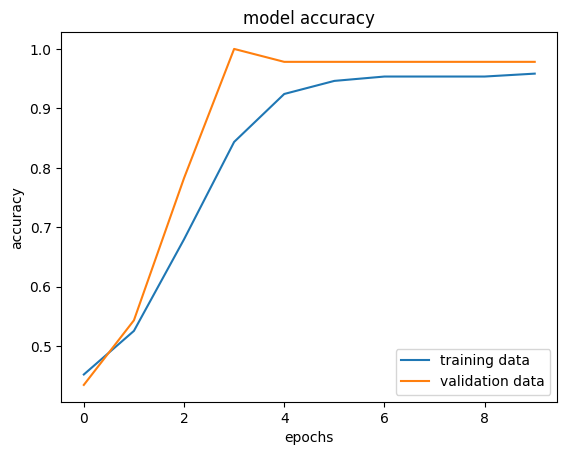

In [ ]:
#visualising accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data','validation data'],loc='lower right')

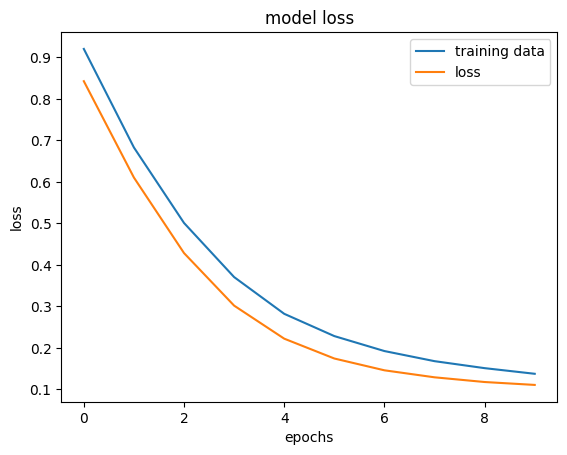

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training data','loss'],loc='upper right')

In [ ]:
#accuracy of model on testdata
loss,accuracy=model.evaluate(x_test_std,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.1219 - accuracy: 0.9561


In [ ]:
print(x.test_std.shape)
print(x.test_std[0])

AttributeError: 'DataFrame' object has no attribute 'test_std'